In [1]:
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(testthat)
library(digest)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer     

<font size = "6"> Top Streamers on Twitch Regression Analysis</font>

Background information: Twitch is an online streaming platform where creators can live-stream to an audience. Some of the most popular genres of streams are eSports (video games), and vlogging. Twitch has a follower system where users "follow" specific channels, this gives them notifications when the channel goes live.  
This dataset was compiled by Aayush Mishra, and consists of the top 1000 channels on Twitch in 2019. Top streamers on the platform are labeled "Partnered" if they have special recognition based on their commitment to streaming. The platform also has age-restricted streams called "Mature" for an audience that is 18+ only.  
We aim to determine if the audience age, twitch partnership status, and an average number of viewers per stream affect the channel's followers. We aim to answer the question of how audience age, twitch partnership, and the average number of viewers correlate with the channel's number of followers?  
We’ll use the dataset “Top Streamers on Twitch” (source: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata?resource=download). The data file is “twitchdata-update.csv”.


Before selecting for our predictors, the columns in the full dataset are:

**Channel:** The name of the channel/account  
**Watch time:** sum of all the time every viewer has watched the channel (in minutes)  
**Stream time:** total time the streamer has streamed (in minutes)  
**Peak viewers:** The most number of viewers the channel ever hit  
**Average viewers:** Average number of viewers  
**Followers:** Number of current followers  
**Followers gained:** Number of followers gained in the span of one year (2019)  
**Views gained:** Number of views gained in one year  
**Partnered:** is the channel Twitch partnered  
**Mature:** 18+ Stream or not (True/False)  
**Language:** what language the stream is in

In [21]:
twitch_data <- read_csv("https://raw.githubusercontent.com/BraedenFong12/DSCI-100-Group-69/main/Dataset")
colnames(twitch_data) <- make.names(colnames(twitch_data), unique = TRUE)

twitch_data <- twitch_data |>
select(Channel, Stream.time.minutes., Followers, Average.viewers)

twitch_data

Rows: 1000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Channel, Language
dbl (7): Watch time(Minutes), Stream time(minutes), Peak viewers, Average vi...
lgl (2): Partnered, Mature

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Channel,Stream.time.minutes.,Followers,Average.viewers
<chr>,<dbl>,<dbl>,<dbl>
xQcOW,215250,3246298,27716
summit1g,211845,5310163,25610
Gaules,515280,1767635,10976
ESL_CSGO,517740,3944850,7714
Tfue,123660,8938903,29602
Asmongold,82260,1563438,42414
NICKMERCS,136275,4074287,24181
Fextralife,147885,508816,18985
loltyler1,122490,3530767,22381


<h2><center>Exploratory Data Analysis</center></h2>

Here, we split our dataset into training and testing data:

In [22]:
set.seed(2000)

twitch_split <- initial_split(twitch_data, prop = 0.70, strata = Followers)
training_data <- training(twitch_split)
testing_data <- testing(twitch_split)

In this section, we find the amount of observations in each class, the mean of each variable, and the number of rows with missing data, and put this information into a table:

In [30]:
#Calculate the mean for each variable
twitch_means <- training_data |> 
map(mean)

#Find missing data (NA)
observations_na <- training_data |> 
is.na() |>
colSums(is.na(training_data))


twitch_means
observations_na

#Total number of observations
nrow(training_data)

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


$Channel
[1] NA

$Stream.time.minutes.
[1] 121715.2

$Followers
[1] 576751.1

$Average.viewers
[1] 4704.026

Channel Stream.time.minutes.            Followers 
                   0                    0                    0 
     Average.viewers 
                   0

[1] 700

<h3><center>Summary of Training Dataset</center></h3>

| Class | Number of missing rows of data | Number of observations | Mean |
| --- | --- | --- | ---|
| Followers | 0 | 700 | 576751.11 |
| Stream time (minutes) | 0 | 700 | 121715.207142857 |
| Average.viewers | 0 | 700 | 4704.02571428571 |


We then made a plot to see the distribution of each variable on its own:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



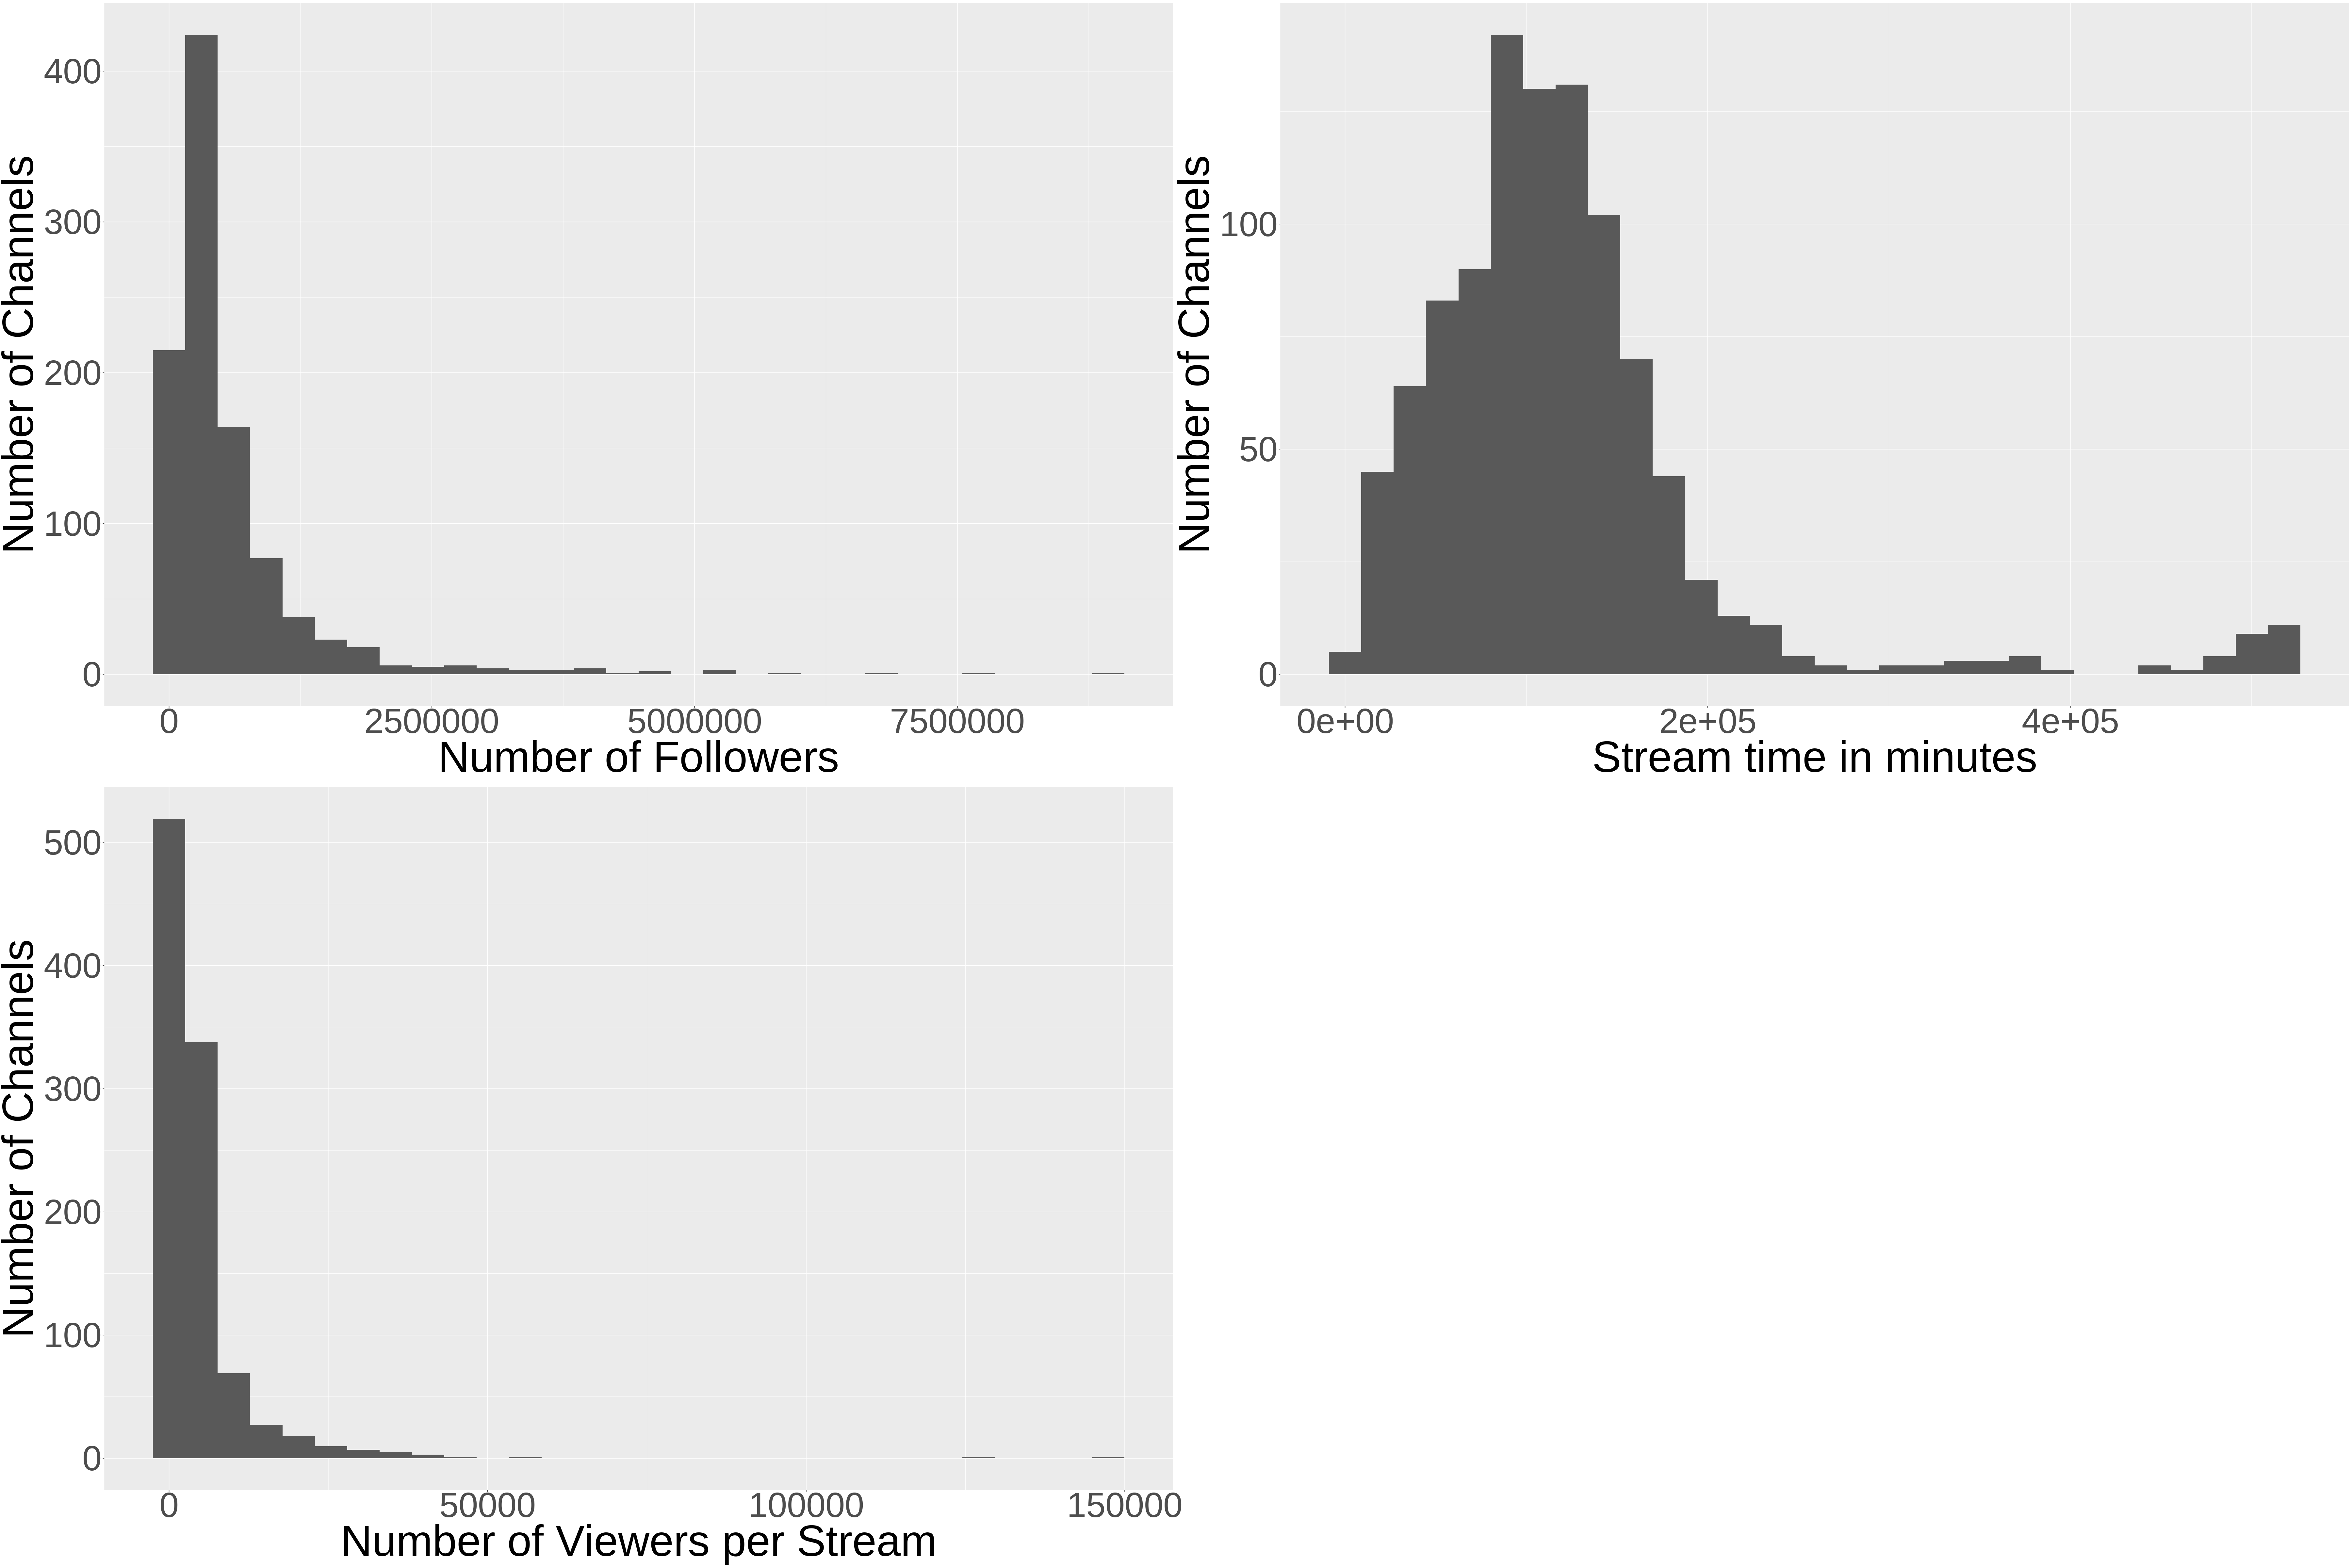

In [34]:
options(repr.plot.width = 60, repr.plot.height = 40)

#Distribution of number of followers for all channels
follower_distribution <- twitch_data |>
ggplot(aes(x = Followers)) +
geom_histogram() +
theme(text = element_text(size = 80)) +
labs(x = "Number of Followers", y = "Number of Channels",
     Title = "Followers Distribution")

#Distribution of total amount of stream time for all channels
stream_time_distribution <- twitch_data |>
ggplot(aes(x = Stream.time.minutes.)) +
geom_histogram() +
theme(text = element_text(size = 80)) +
labs(x = "Stream time in minutes", y = "Number of Channels",
     Title = "Stream Time Distribution")

#Distribution of average number of viewers per stream for all channels
average.viewers_distribution <- twitch_data |>
ggplot(aes(x = Average.viewers)) +
geom_histogram() +
theme(text = element_text(size = 80)) +
labs(x = "Number of Viewers per Stream", y = "Number of Channels",
     Title = "Average Viewers Distribution")



grid.arrange(follower_distribution,stream_time_distribution, average.viewers_distribution, ncol = 2)


In the next plot, we do a preliminary scatterplot to see the distribution of our predictor variables (Average viewers and stream time) in correlation with our response variable (Followers):

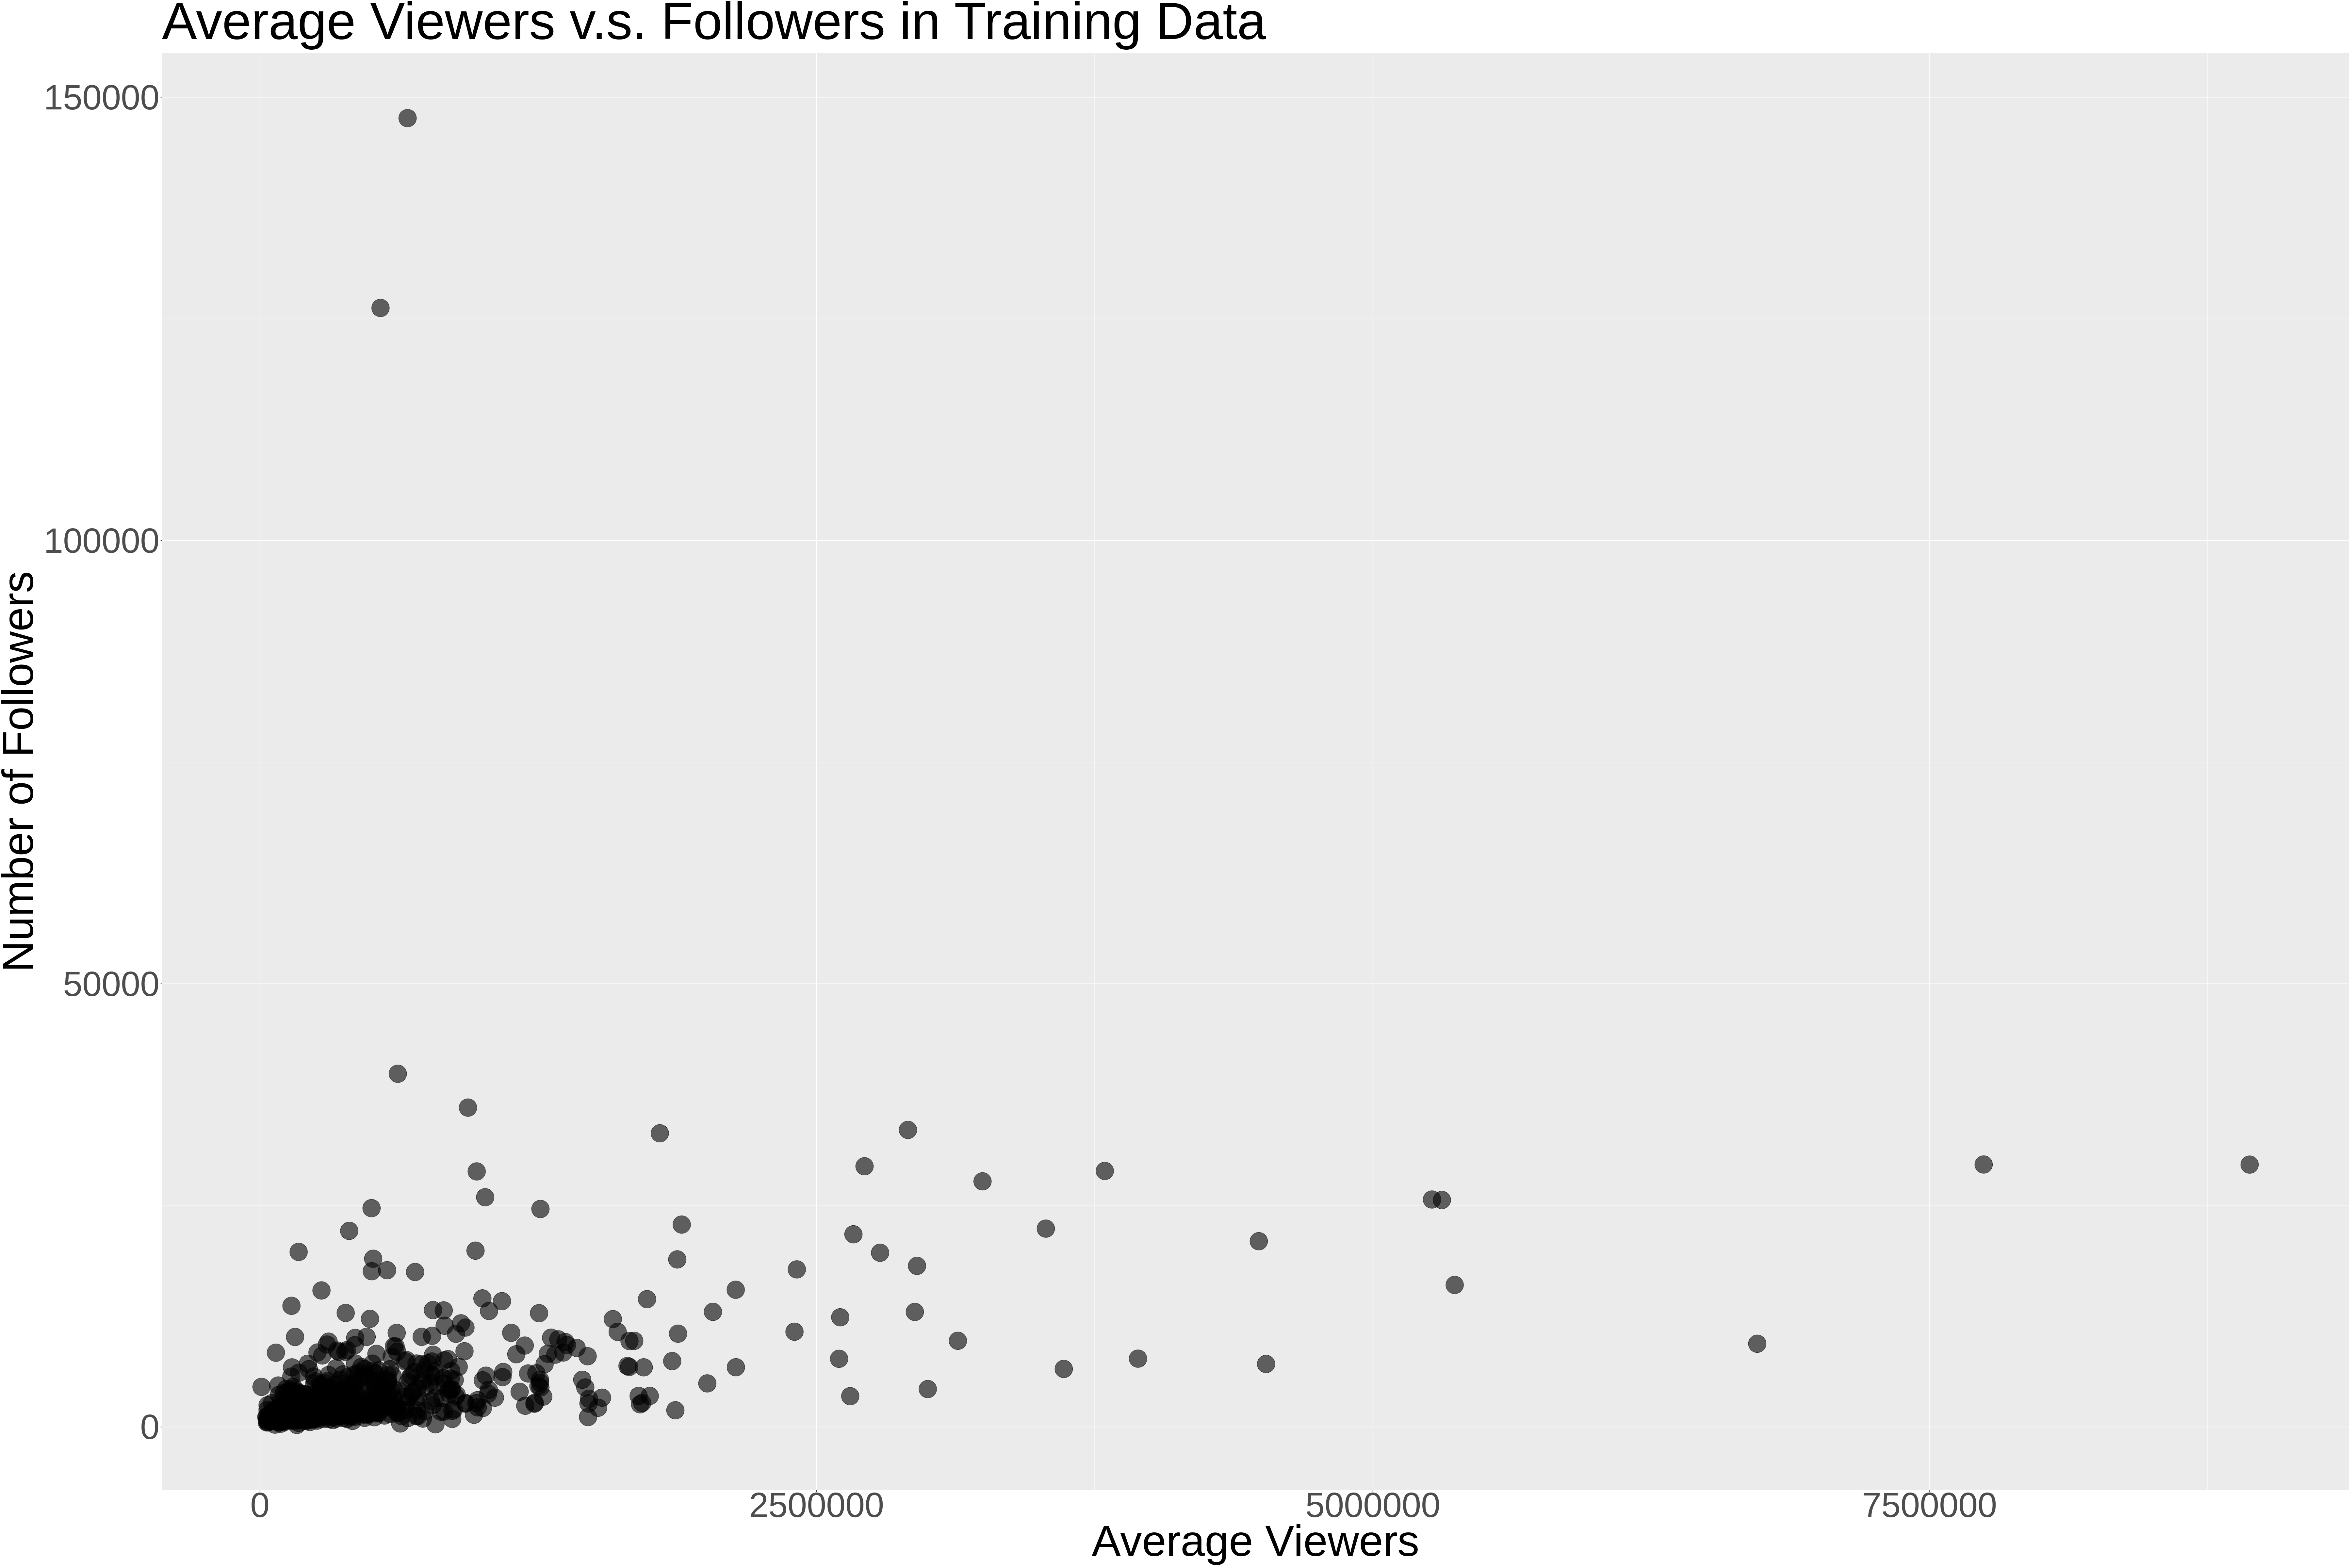

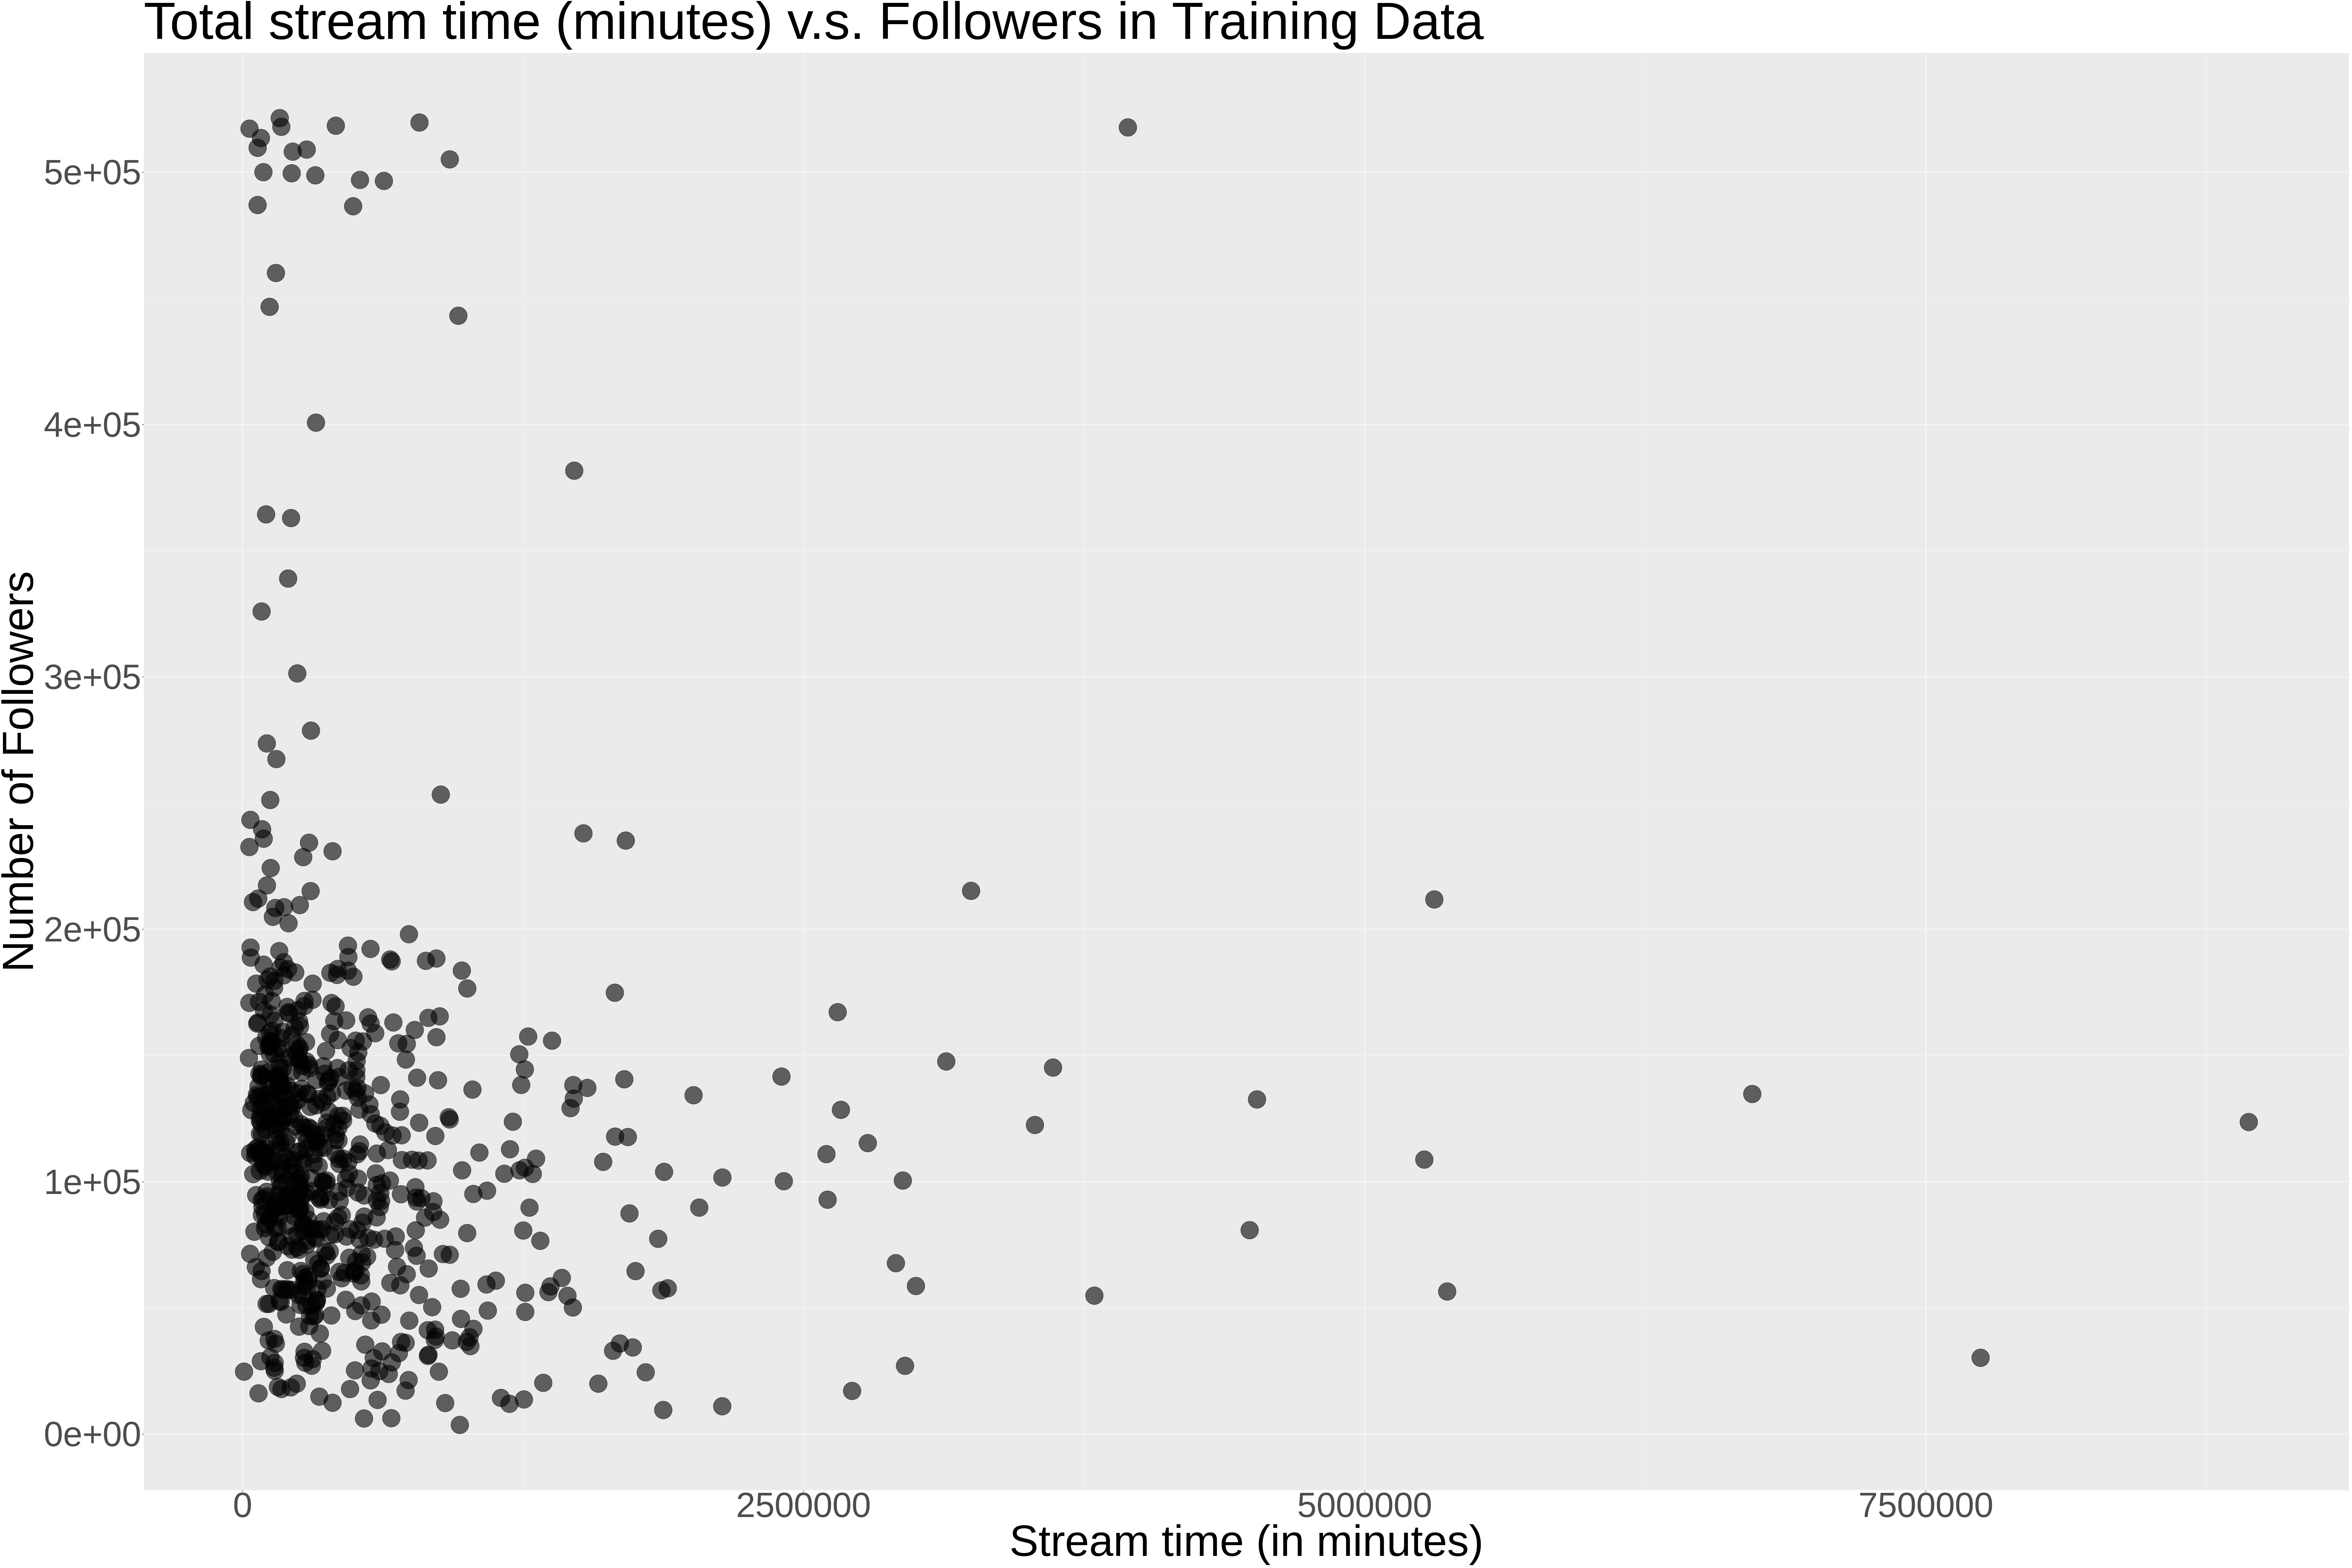

In [38]:
#Graph of average viewers vs Number of followers in our training data
viewers_vs_followers <- training_data |>
ggplot(aes(x = Followers, y = Average.viewers)) +
geom_point(size = 15, alpha = 0.6) +
theme(text = element_text(size = 80)) +
labs(x = "Average Viewers", y = "Number of Followers",
     title = "Average Viewers v.s. Followers in Training Data")
viewers_vs_followers

#Graph of total stream time vs Number of followers in our training data
stream_time_vs_followers <- training_data |>
ggplot(aes(x = Followers, y = Stream.time.minutes.)) +
geom_point(size = 15, alpha = 0.6) +
theme(text = element_text(size = 80)) +
labs(x = "Stream time (in minutes)", y = "Number of Followers",
     title = "Total stream time (minutes) v.s. Followers in Training Data")
stream_time_vs_followers

<h3><center>Methods</center></h3>

To build our regression model, we will split the training and testing sets to ensure that we assess the performance of our method on data not seen during training. We will train our model to predict the number of followers a streamer has based on if their content is mature, if they are partnered, and their average viewers per stream. We can use the K-nearest neighbors-based approach in regression to make predictions, using neighboring points to the new issue of interest to suggest/predict the number of followers. Then, we will use cross-validation to choose K (using RMSPE) and assess how well our model predicts unseen data, using the RMSPE on the unused testing data we stored away earlier. Next, we will re-train our KNN regression model on the entire training data set. Using multiple predictors in KNN regression, we will do 5-fold cross-validation to choose the number of neighbors via the minimum RMSPE.

<h3><center>Expected Outcomes and Significance</center></h3>

We believe that an audience under 18 years old, being partnered, and having higher average viewers will mean more followers on the channel. Analyzing data gathered from top streamers can help smaller streamers maximize their streaming profit. This will also help Twitch know which streamers to monetize. Larger streamers can use the data to further improve their popularity by adjusting factors that may seem minor in their content and streams. This analysis leads to future questions including, which factor has more effect on a channel's revenue, the amount of followers or amount of average viewers?

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
         (Intercept)       Average.viewers  Stream.time.minutes.  
           3.964e+05             3.491e+01             1.326e-01  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6.019200e+05
rsq,standard,3.922176e-01
mae,standard,3.782747e+05


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



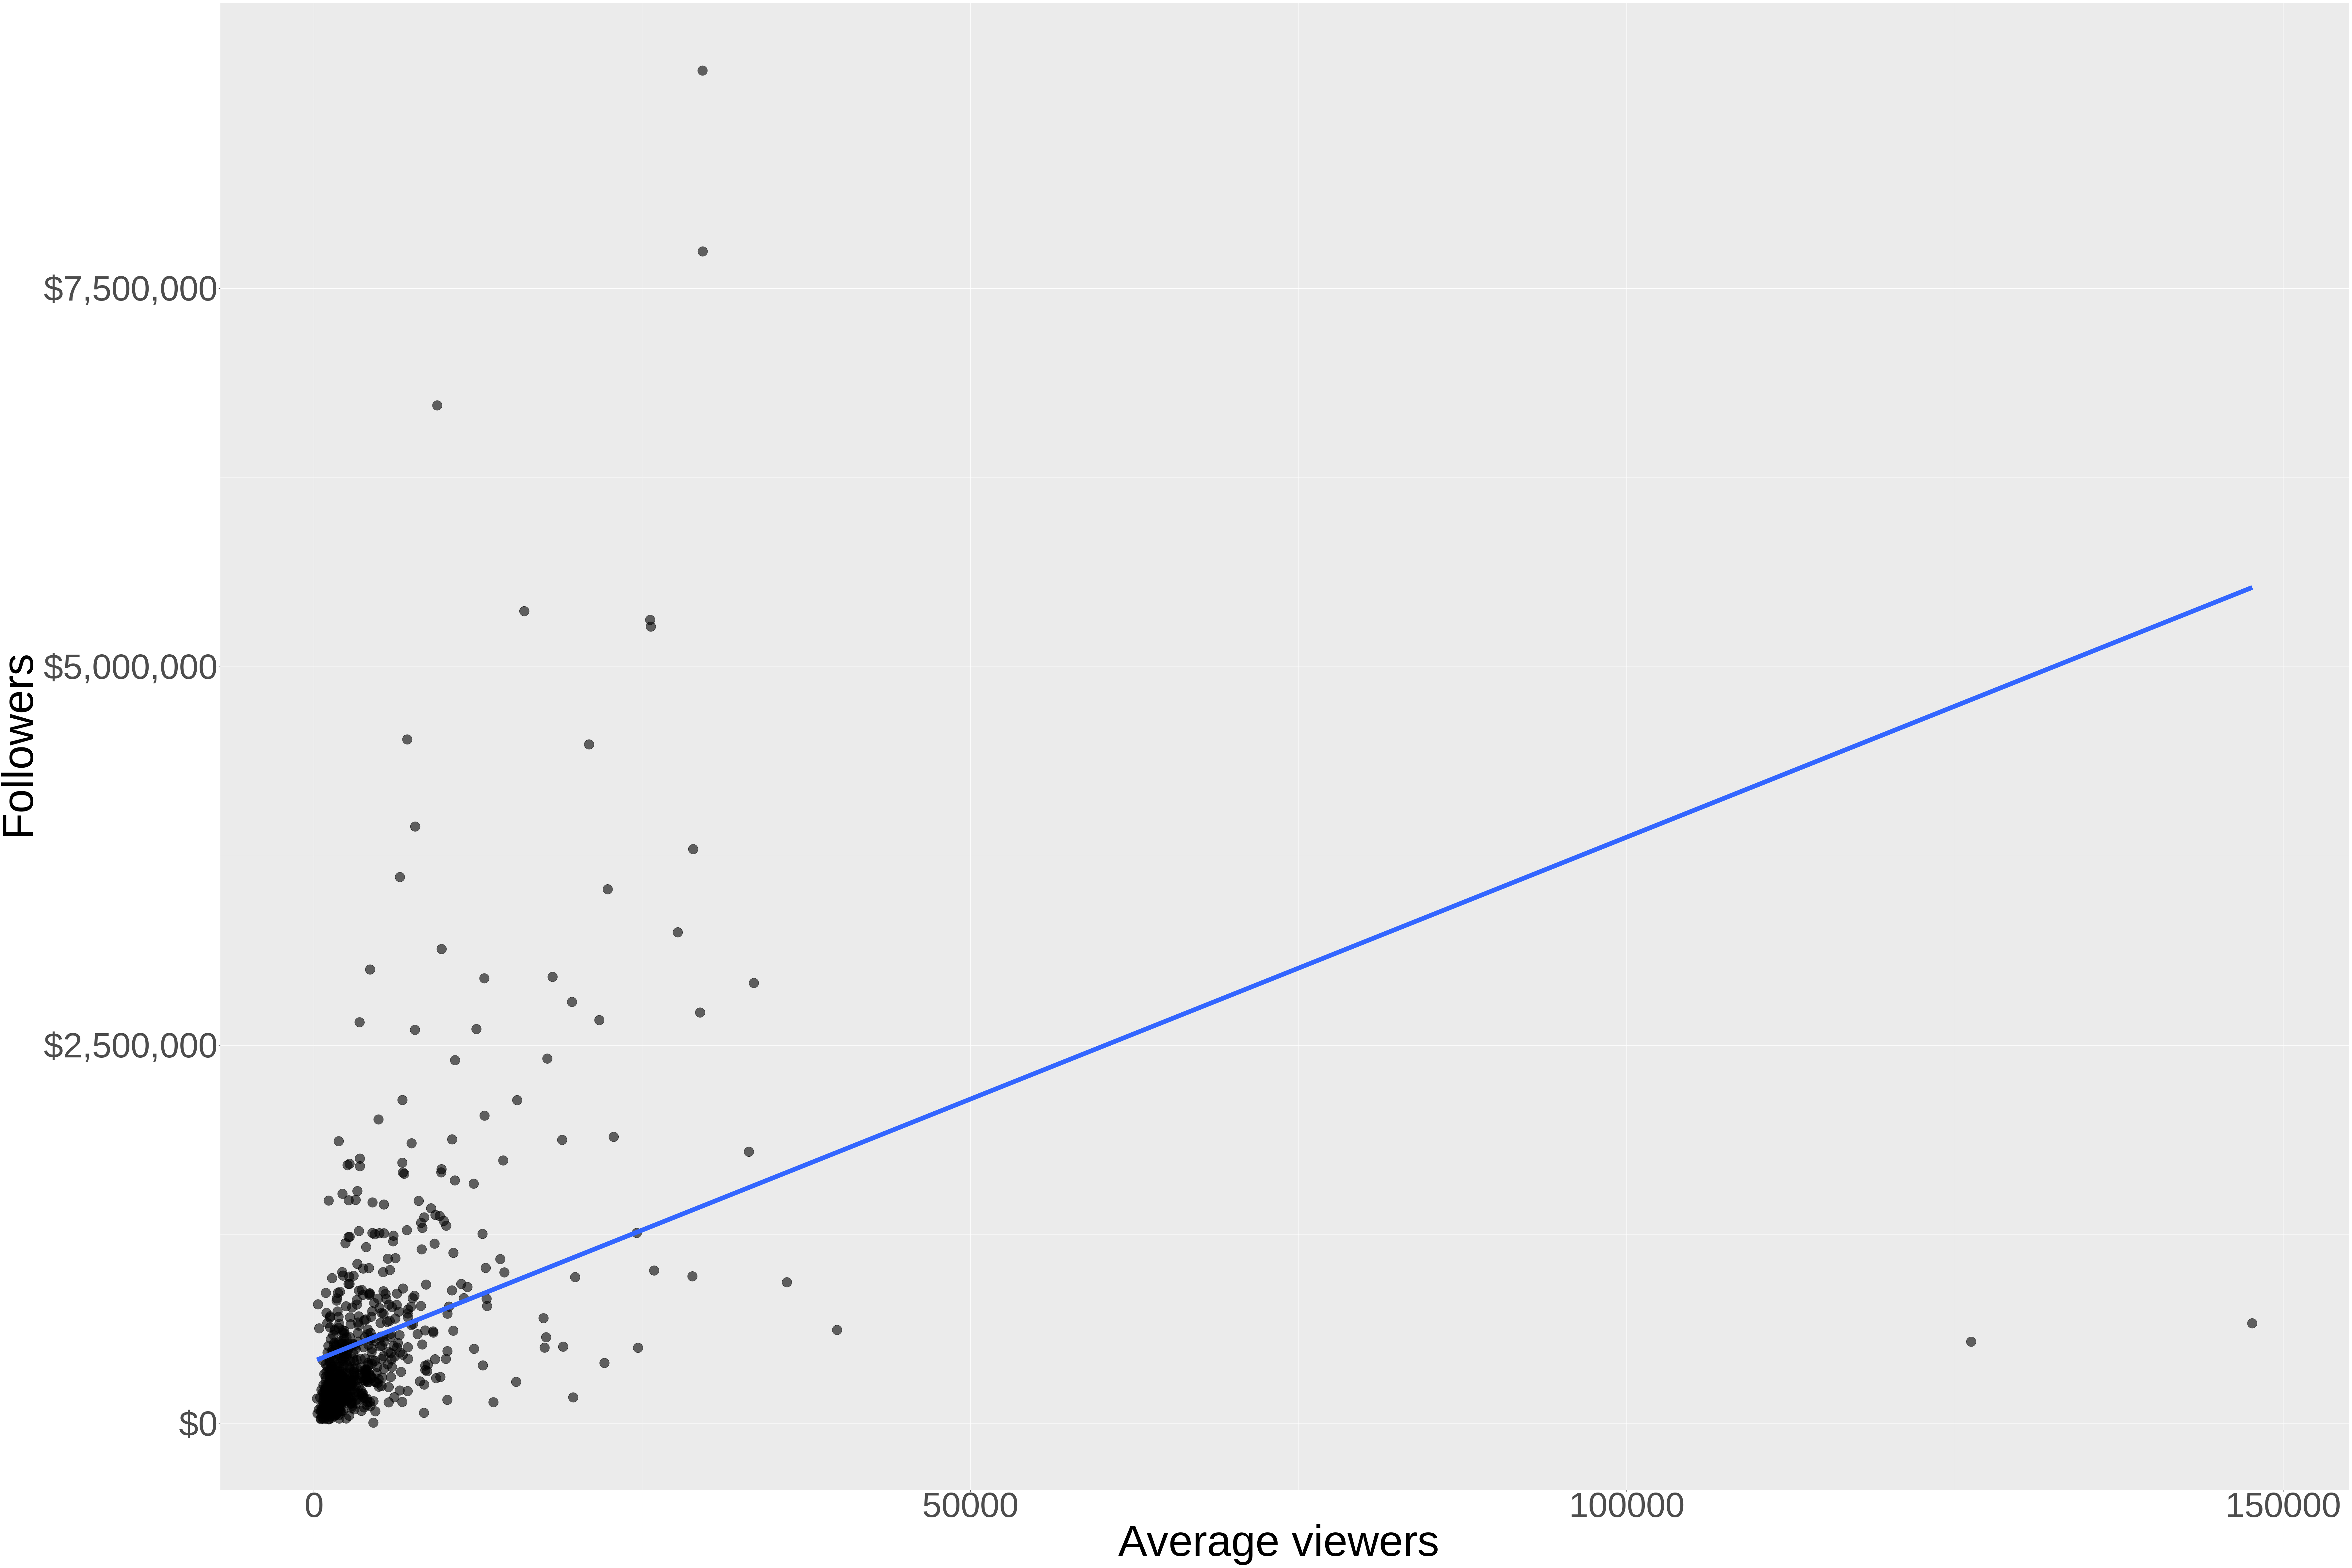

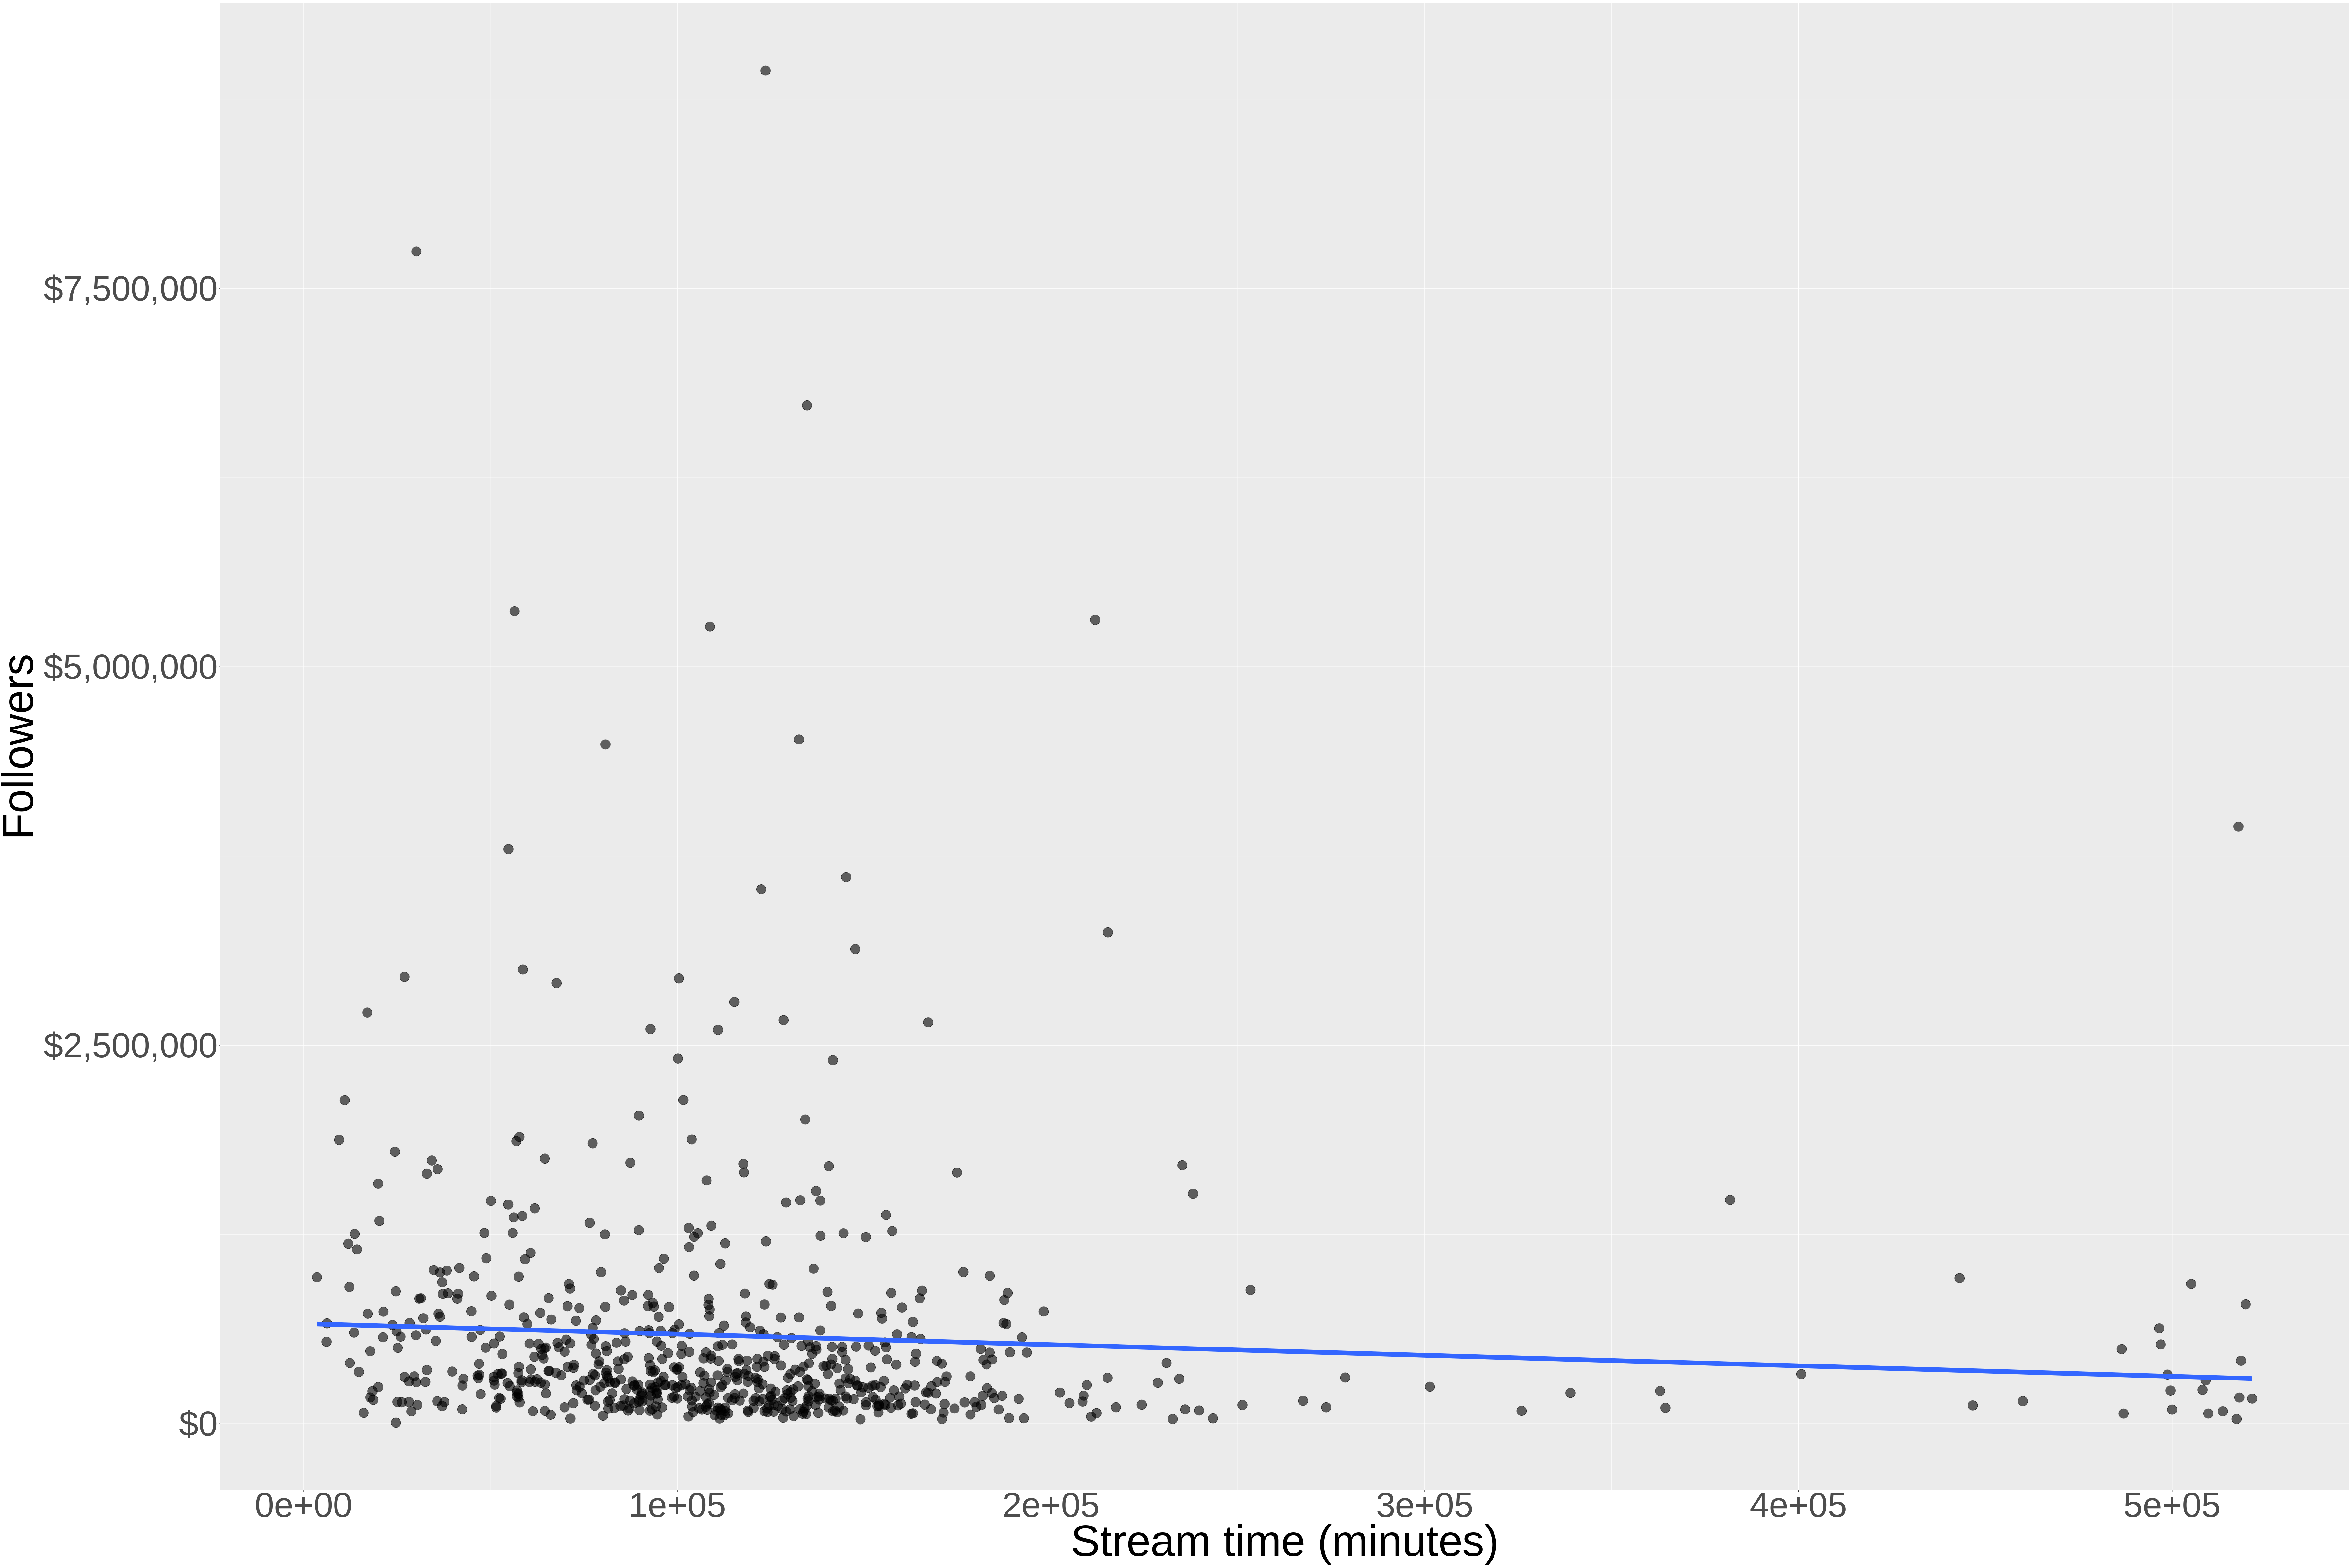

In [48]:
#Multivariable linear regression process

#Create a recipe with Number of followers as the response variable and the predictor variables being average 
#viewers and stream time in minutes using the training data
lin_recipe <- recipe(Followers~Average.viewers + Stream.time.minutes., data = training_data)
lin_recipe

#Create a specification for linear regression
lin_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#Create a workflow combining the recipe and specification
lin_fit <- workflow() |>
  add_recipe(lin_recipe) |>
  add_model(lin_spec) |>
  fit(data = training_data)
lin_fit


lin_test_results <- lin_fit |>
  predict(testing_data) |>
  bind_cols(testing_data) |>
  metrics(truth = Followers, estimate = .pred)

lin_test_results


# Calculate the rmse value
lin_rmspe <- lin_test_results |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

#Plot for average viewers vs number of followers with the linear regression line fitted
lin_plot_average_viewers <- ggplot(training_data, aes(x = Average.viewers, y = Followers)) +
  geom_point(size = 8, alpha = 0.6) +
  xlab("Average viewers ") +
  ylab("Followers") +
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 80)) +
  geom_smooth(method = "lm", size = 4, se = FALSE)
lin_plot_average_viewers 

#Plot for stream time vs number of followers with the linear regression line fitted
lin_plot_stream_time <- ggplot(training_data, aes(x = Stream.time.minutes., y = Followers)) +
  geom_point(size = 8, alpha = 0.6) +
  xlab("Stream time (minutes)") +
  ylab("Followers") +
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 80)) +
  geom_smooth(method = "lm", size = 4, se = FALSE)
lin_plot_stream_time

